# Session #2  Homework

This notebook represent the #2 Homework of ML-Zoomcamp 

### Dataset
In this homework, we will use the California Housing Prices from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

The goal of this homework is to create a regression model for predicting housing prices (column `'median_house_value'`).

### Features

For the rest of the homework, you'll need to use only these columns:

* `'latitude'`,
* `'longitude'`,
* `'housing_median_age'`,
* `'total_rooms'`,
* `'total_bedrooms'`,
* `'population'`,
* `'households'`,
* `'median_income'`,
* `'median_house_value'`

Select only them.

### Import packages

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

### Get the data

In [4]:

url_data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'
df = pd.read_csv(url_data)

### Inspect the data

In [5]:
df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12276,-117.11,33.98,25.0,1254.0,312.0,715.0,301.0,2.7344,149000.0,INLAND
19615,-121.27,37.56,31.0,1223.0,330.0,1067.0,245.0,2.8558,100000.0,INLAND
14803,-117.13,32.63,10.0,7374.0,1157.0,1900.0,794.0,8.7991,478500.0,NEAR OCEAN
13768,-117.07,34.05,14.0,5764.0,1006.0,1876.0,841.0,1.9694,173200.0,INLAND
1699,-122.28,37.96,35.0,1579.0,243.0,734.0,264.0,5.5000,201000.0,NEAR BAY


Select only indicated columns

In [6]:
columns = ['latitude','longitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']
df = df[columns]

# Exploratory data analysis
* Look at the median_house_value variable. Does it have a long tail?


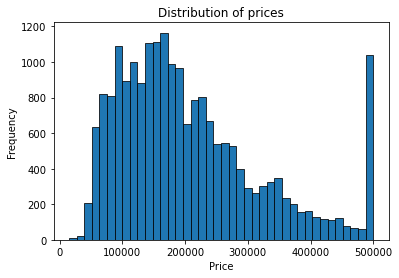

In [9]:
plt.figure(figsize=(6, 4))

sns.histplot(df.median_house_value, bins=40, alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of median_house_value')

plt.show()

* The distribution is skewed to the left
* The distribution does not have a long tail

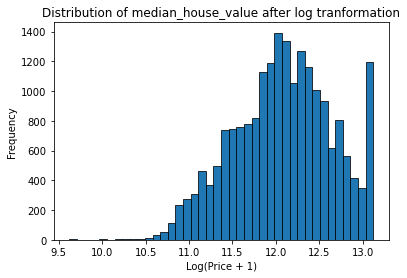

In [11]:
log_median_house_value = np.log1p(df.median_house_value)

plt.figure(figsize=(6, 4))

sns.histplot(log_median_house_value, bins=40, alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of median_house_value after log tranformation')

plt.show()

The distribution is more normally distributed

# Question 1
Find a feature with missing values. How many missing values does it have?

In [ ]:
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

# Question 2
What's the median (50% percentile) for variable 'population'?

In [ ]:
df['population'].median()

1166.0

# Regression

### Split the data

* Shuffle the initial dataset, use seed 42.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Make sure that the target value ('median_house_value') is not in your dataframe.
* Apply the log transformation to the median_house_value variable using the np.log1p() function.

Shuffle the initial dataset, use seed 42.

# Validation framework
Split your data in train/val/test sets, with 60%/20%/20% distribution.

In [ ]:
np.random.seed(42)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [ ]:
print(n,n_val+n_test+n_train )

20640 20640


Separate target variable ('median_house_value') and remove it 

In [ ]:
target_variable = 'median_house_value'
y_train = df_train[target_variable]
y_val = df_val[target_variable]
y_test = df_test[target_variable]

del df_train[target_variable]
del df_val[target_variable]
del df_test[target_variable]

Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [ ]:
y_train = np.log1p(y_train.values)
y_val = np.log1p(y_val.values)
y_test = np.log1p(y_test.values)

# Question 3
* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using round(score, 2)
* Which option gives better RMSE?

In [ ]:
def linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)


In [ ]:
df_train.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
dtype: int64

Linear regression (Filling missing data with 0)

In [ ]:
def prepare_X(df):
    X = df.copy()
    X = X.fillna(0).values
    return X

X_train = prepare_X(df_train)
w_0, w = linear_regression(X_train , y_train)


In [ ]:
X_val = prepare_X(df_val)
y_pred = w_0 + X_val@w

score =rmse(y_val, y_pred)
round(score,2)

0.33

In [ ]:
w_0, w 

(-11.686975241328462,
 array([-2.82087184e-01, -2.76255120e-01,  2.91329621e-03, -8.64531514e-06,
         1.50811922e-04, -2.08205659e-04,  5.69546573e-04,  1.71308139e-01]))

Linear regression (Filling missing data with mean)

In [ ]:
   
def prepare_X(df,mean):
    X = df.copy()
    X = X.fillna(mean).values
    return X

total_bedrooms_mean = df_train['total_bedrooms'].mean()
X_train = prepare_X(df_train,total_bedrooms_mean)
w_0, w = linear_regression(X_train , y_train)


In [ ]:
X_val = prepare_X(df_val,total_bedrooms_mean)
y_pred = w_0 + X_val@w

score =rmse(y_val, y_pred)
round(score,2)

0.33

R: The rmse score is equally good at filling in the missing values with 0 and with the mean.

### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

In [ ]:
def ridge_regression(X, y,r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [ ]:
def prepare_X(df):
    X = df.copy()
    X = X.fillna(0).values
    return X

r_choices= [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10,100]

#prepare DF
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)
for r in r_choices:
    #Train model    
    w_0, w = ridge_regression(X_train , y_train,r)
    #Prediction    
    y_pred = w_0 + X_val@w

    score =rmse(y_val, y_pred)
    print(f'the rmse score with r:{r} is',round(score,2))

the rmse score with r:0 is 0.33
the rmse score with r:1e-06 is 0.33
the rmse score with r:0.0001 is 0.33
the rmse score with r:0.001 is 0.33
the rmse score with r:0.01 is 0.33
the rmse score with r:0.1 is 0.33
the rmse score with r:1 is 0.33
the rmse score with r:5 is 0.34
the rmse score with r:10 is 0.34
the rmse score with r:100 is 0.34


### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

In [ ]:
df

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [ ]:
def train_val_test(seed):
    np.random.seed(seed)

    n = len(df)

    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)

    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df.iloc[idx]

    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()
    
    target_variable = 'median_house_value'
    
    y_train = df_train[target_variable]
    y_val = df_val[target_variable]
    y_test = df_test[target_variable]
    
    del df_train[target_variable]
    del df_val[target_variable]
    del df_test[target_variable]
    
    y_train = np.log1p(y_train.values)
    y_val = np.log1p(y_val.values)
    y_test = np.log1p(y_test.values)
    
    
    return df_train, df_val, df_test, y_train, y_val, y_test

seed_choices = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

scores =[]

for seed in seed_choices:
    df_train, df_val, df_test, y_train, y_val, y_test = train_val_test(seed)
    X_train = prepare_X(df_train)
    #Train model
    w_0, w = linear_regression(X_train , y_train)
    X_val = prepare_X(df_val)
    
    #Prediction
    y_pred = w_0 + X_val@w

    score =rmse(y_val, y_pred)
    score = round(score,2)
    scores.append(score)

In [ ]:
np.array(scores).std()

0.005385164807134491

### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

In [ ]:
df_train, df_val, df_test, y_train, y_val, y_test = train_val_test(9)

df_train = pd.concat([df_train,df_val])
y_train = np.concatenate((y_train, y_val), axis=0)

X_train = prepare_X(df_train)
#Train model
w_0, w = ridge_regression(X_train , y_train,0.001)
X_test = prepare_X(df_test)

#Prediction
y_pred = w_0 + X_test@w

score =rmse(y_test, y_pred)
round(score,2)

0.35